# Introduction
A recently published report by the World Health Organization (WHO) highlights the alarming impact of tobacco, alcohol, ultra-processed foods (UPFs), and fossil fuels on public health in Europe. According to the report, these industries are responsible for 2.7 million deaths annually, a staggering 24.5% of all mortality across Europe’s 53 states. Smoking remains a significant concern, with approximately 29% of European adults using tobacco, leading to lung cancer, cardiovascular diseases, and respiratory disorders. Alcohol consumption is also widespread, particularly among adolescents, with 57% of 15-year-olds having tried alcohol and harmful drinking patterns being prevalent. As emphasized in one of the Guardian article: (https://www.theguardian.com/society/article/2024/jun/12/tobacco-alcohol-ultra-processed-foods-fossil-fuels-deaths), the WHO calls for stricter government regulations on these health-harming products, pointing out how misleading marketing and interference from powerful industries derail efforts to combat diseases like cancer, heart disease, and diabetes. The report emphasizes that European countries are failing to meet sustainable development goals related to health, with insufficient measures in place to reduce smoking, alcohol consumption, and the appeal of unhealthy foods. As we explore this topic further, we can delve into descriptive statistics, graphs, and charts to understand the trends and impact more deeply.


In [2]:
import warnings ; warnings.warn = lambda *args,**kwargs: None
import numpy as np
import scipy.stats as spst
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('D:/PGPM-24-25/Python/number-of-deaths-by-risk-factor.csv')

In [50]:
df.isnull().sum()

Entity                                                                                                                   0
Code                                                                                                                   690
Year                                                                                                                     0
Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages                  0
Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages                           0
Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages                      0
Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages                                   0
Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages                            0
Deaths that are 

Despite having null values for the Code column its usage is not mandatory for further analysis which is why we have decide to leave it as is

# Data Visulisation and Analysis

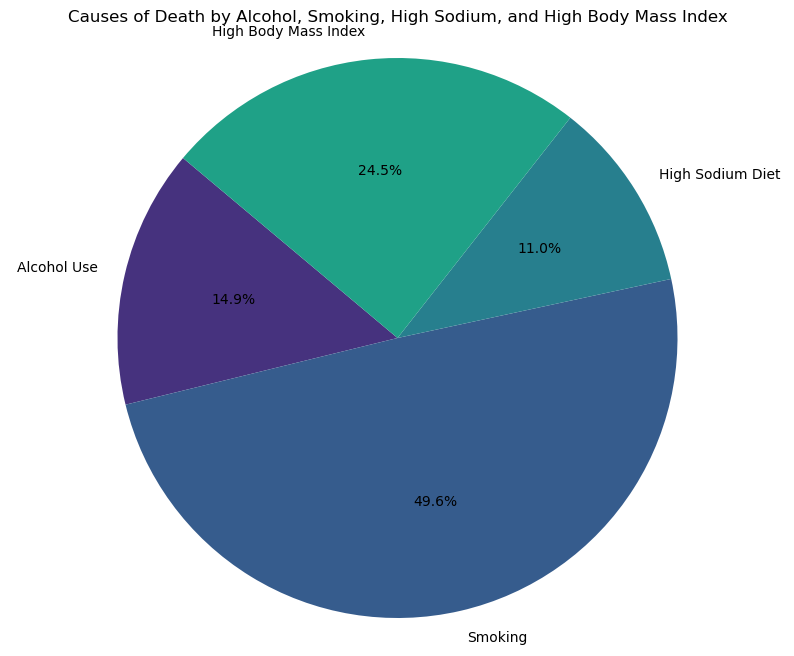

In [4]:
selected_columns_for_pie = [
    'Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages',
    'Deaths that are from all causes attributed to smoking, in both sexes aged all ages',
    'Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages',
    'Deaths that are from all causes attributed to high body-mass index, in both sexes aged all ages'
]

aggregate_data = df[selected_columns_for_pie].sum()
aggregate_data.index = ['Alcohol Use', 'Smoking', 'High Sodium Diet', 'High Body Mass Index']
plt.figure(figsize=(10, 8))
plt.pie(aggregate_data, labels=aggregate_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Causes of Death by Alcohol, Smoking, High Sodium, and High Body Mass Index')
plt.axis('equal') 
plt.show()


The above pie chart provides the distribution for causes of death attributed to alcohol use, smoking, high sodium diet, and high body mass index, the key observations would be as follows:
Of these four risk factors, smoking makes the single largest contribution, with 49.6 percent of all deaths attributed to it alone. This is clearly indicative—almost half of the deaths due to these four risk factors are due to smoking
Primary Factory : Smoking stands outstanding as the leading cause of death among these risk factors; this suggests that tobacco use is the key public health challenge that requires quite a considerable mobilization with aggressive and sustained intervention.
Dietary and Lifestyle Factors: At the same time, 35.5 percent of deaths come as a result of high BMI associated with a diet high in sodium, which immediately indicates that dietary and lifestyle factors are vital determinants of mortality. In this respect, one of the key elements in public health strategy formulation is promoting healthy eating and active living.

These are all, to a great extent, preventable causes of premature death. Indeed, serious mortality reductions might result from effective interventions against smoking, drinking alcohol, unhealthy diets, and body weight management.


In [6]:
data= df.groupby('Year').sum().reset_index()

<Figure size 2500x2000 with 0 Axes>

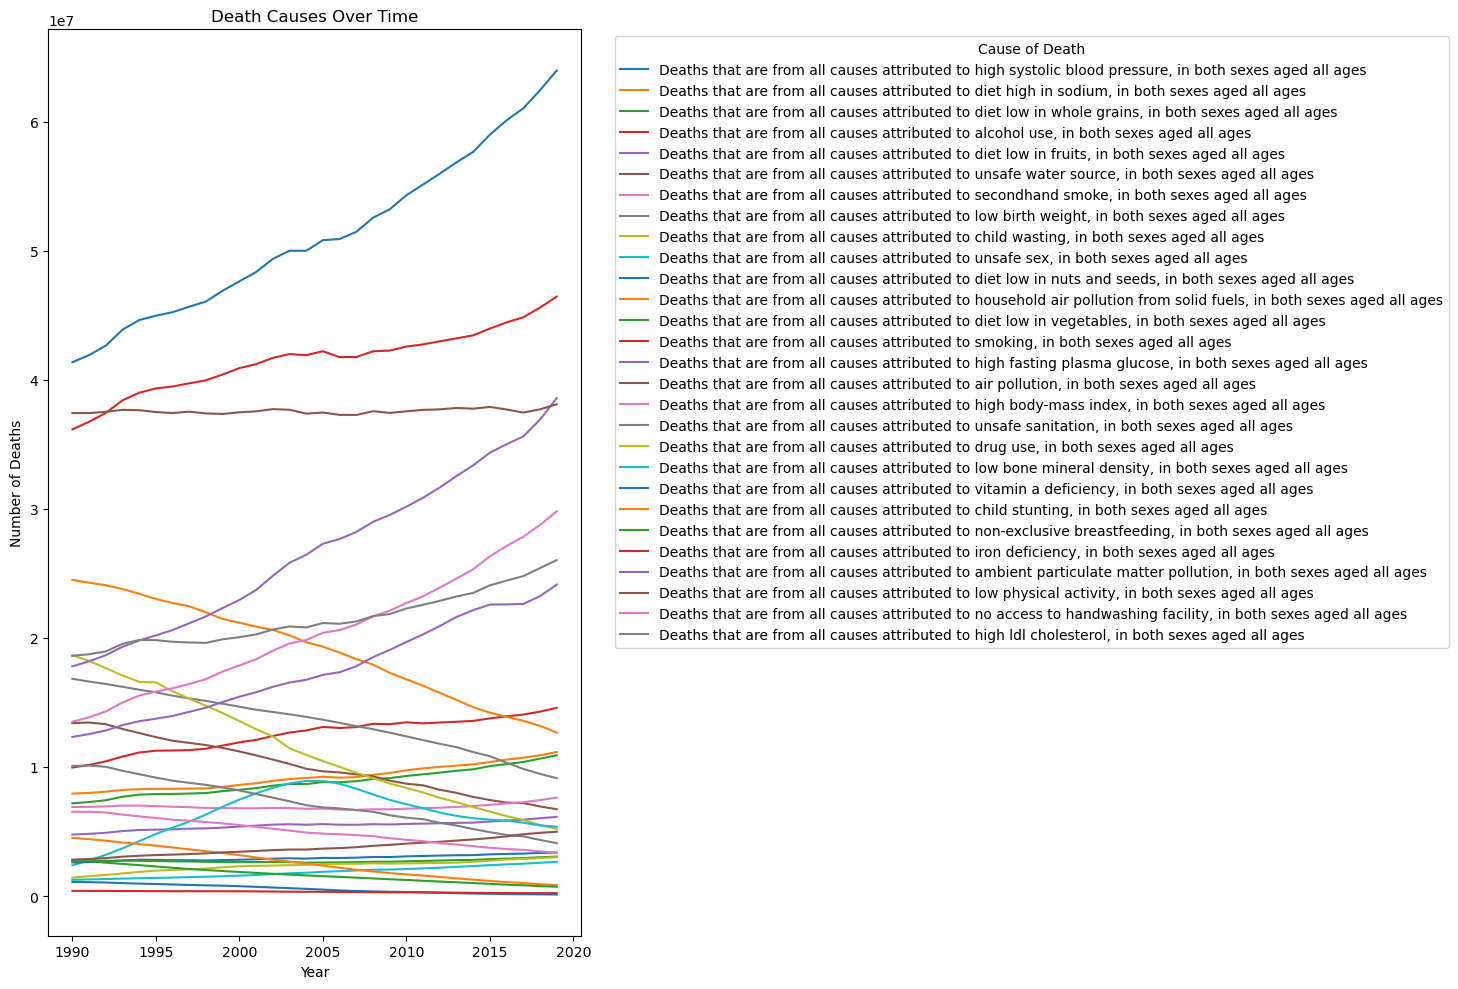

In [7]:
plt.figure(figsize=(25, 20))
data.set_index('Year').plot(kind='line', figsize=(15, 10))
plt.title('Death Causes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Graph Overview (1990-2019): The graph provides a detailed look at mortality trends over three decades in Europe, measuring deaths in millions on the y-axis and years on the x-axis. Each cause of death is represented by a unique line and labeled in the graph's legend.

Medical Advancements: There have been significant advancements in medical research that have improved life expectancy and reduced deaths from certain causes, particularly those related to smoking and alcohol abuse.

Rise in Preventable Deaths:

    High Systolic Blood Pressure: Represented by a blue line, deaths have nearly doubled from just over 4 million in 1990 to 7 million in 2019, highlighting the increasing prevalence of hypertension-related issues.
    Smoking and Secondhand Smoke: Deaths, shown by the red and pink lines, have consistently increased, indicating ongoing challenges with smoking and vaping.
    Alcohol Abuse: The trend shows a peak in alcohol-related deaths in 2005, followed by a general decline.

Comparative Analysis of Smoking and Alcohol-Related Deaths:

    Smoking: Peaked in 1994 with the highest number of deaths, followed by a general decline from 2004 to 2014, a slight increase in 2015, and then stabilization.
    Alcohol Consumption: Deaths peaked between 2000 and 2010, with significant declines post-2005, although the trend shows fluctuations.

Conclusion: Despite medical advancements, there is a concerning rise in preventable deaths, particularly from high blood pressure, smoking, and alcohol. While alcohol-related deaths have seen a significant decline since 2005, smoking-related deaths continue to show inconsistent patterns..

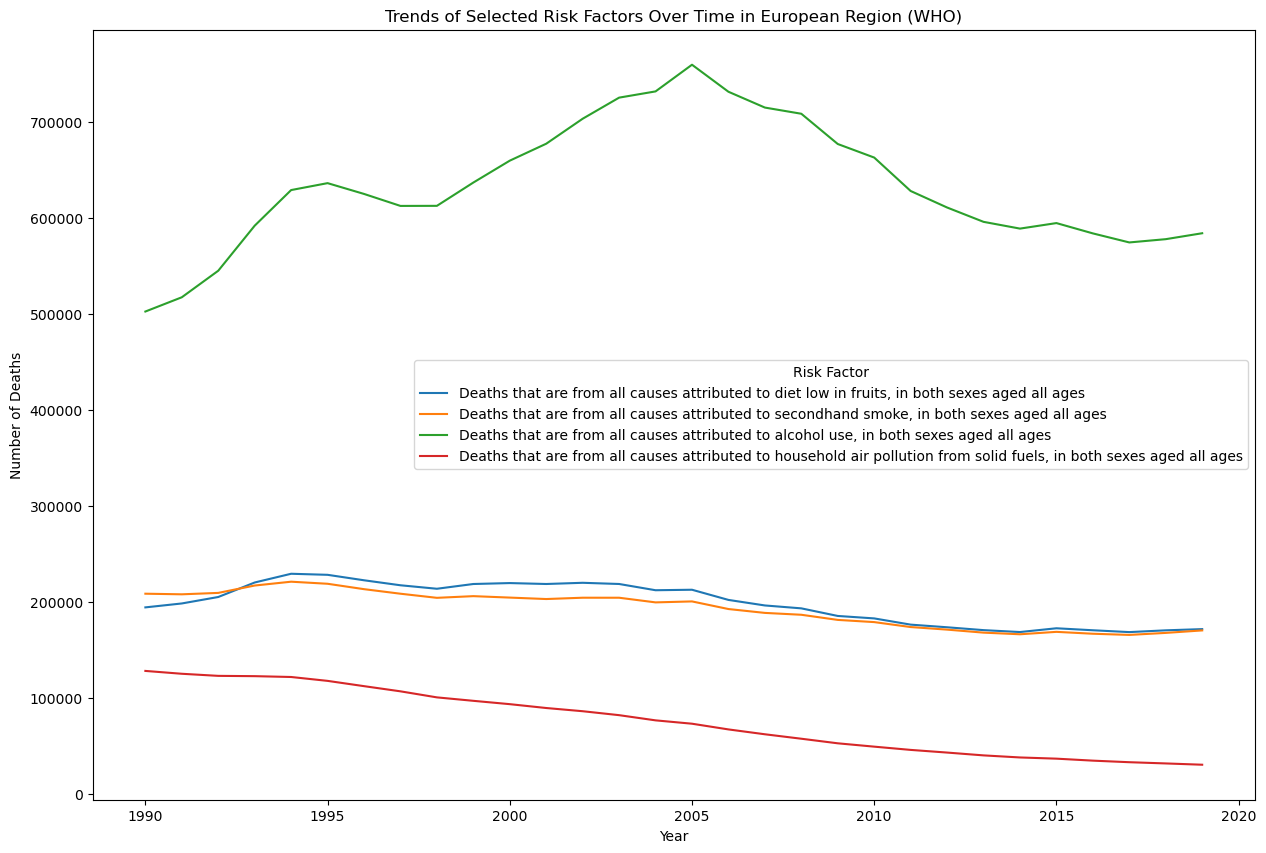

In [9]:
risk_factors = ['Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages', 'Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages', 'Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages', 'Deaths that are from all causes attributed to household air pollution from solid fuels, in both sexes aged all ages']
country = 'European Region (WHO)'
country_data = df[df['Entity'] == country]

# Plotting the trends for selected risk factors over time for Afghanistan
plt.figure(figsize=(15, 10))
for factor in risk_factors:
    sns.lineplot(data=country_data, x='Year', y=factor, label=factor)

plt.title(f'Trends of Selected Risk Factors Over Time in {country}')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Risk Factor')
plt.show()
warnings.filterwarnings('ignore')

Graphs shows trends of selected riks factors of death in Europe and how it compares Deaths caused by alcohol and passive smoking playing a role in it

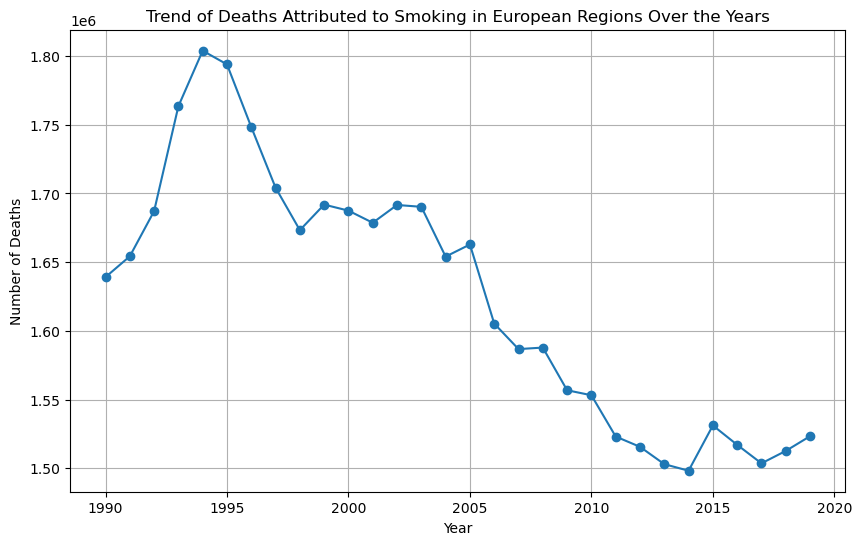

In [11]:
country_data = df[df['Entity'] =='European Region (WHO)']
smoking_column = 'Deaths that are from all causes attributed to smoking, in both sexes aged all ages'
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data[smoking_column], marker='o', linestyle='-')
plt.title(f'Trend of Deaths Attributed to Smoking in European Regions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

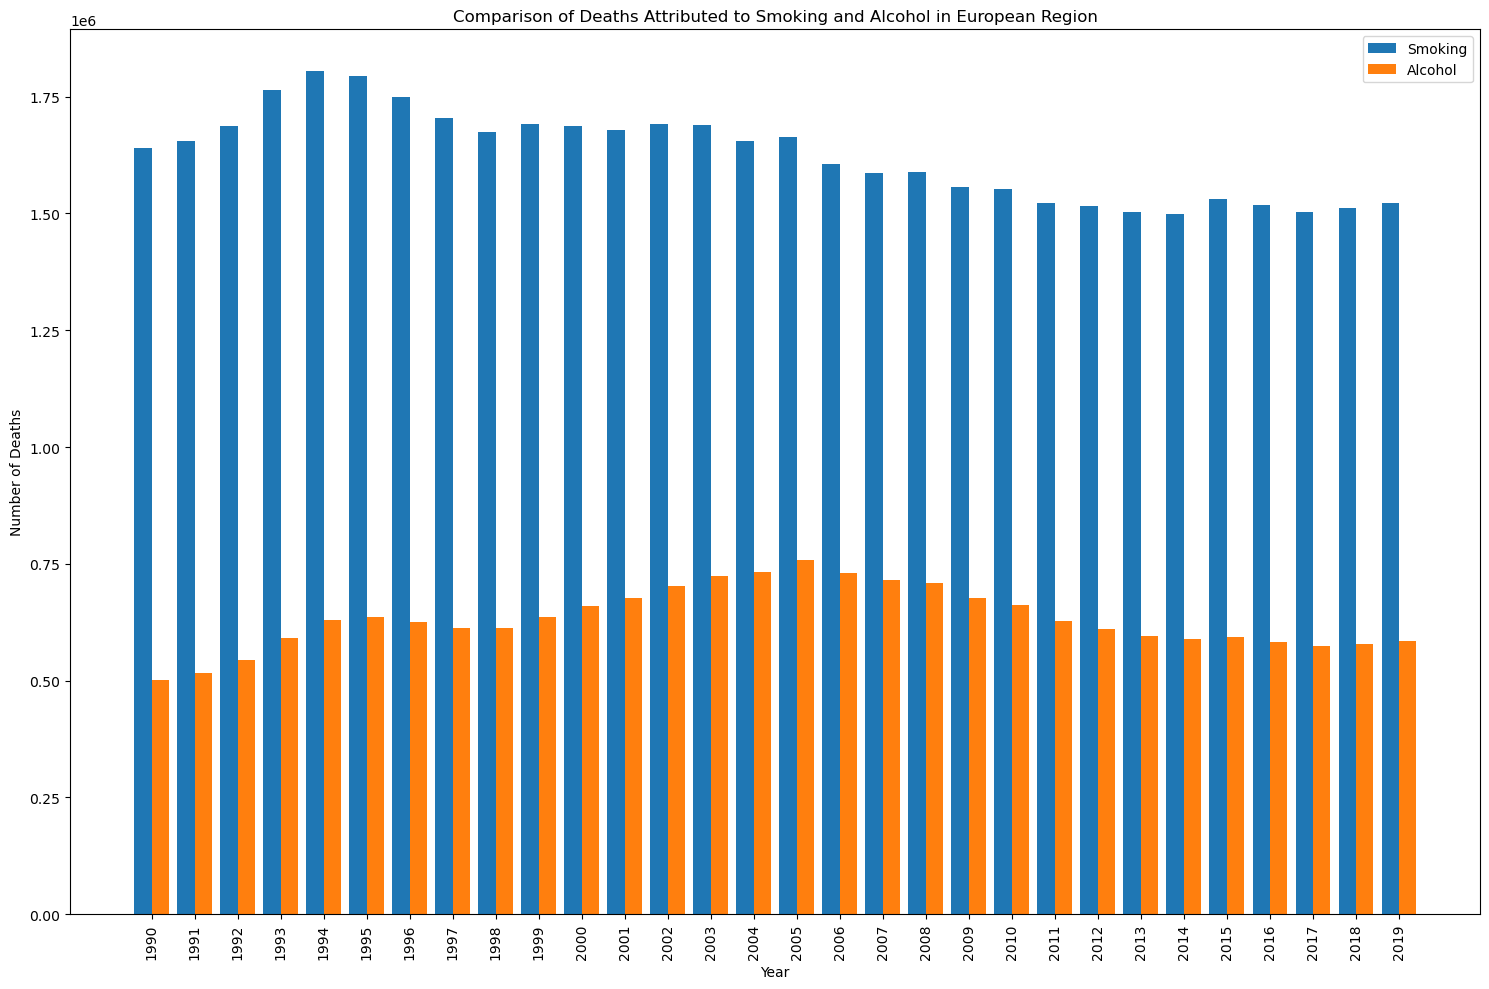

In [12]:
country_data = df[df['Entity'] == 'European Region (WHO)']
smoking_column = 'Deaths that are from all causes attributed to smoking, in both sexes aged all ages'
alcohol_column = 'Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages'
years = country_data['Year']
bar_width = 0.4
index = np.arange(len(years))
plt.figure(figsize=(15, 10))
plt.bar(index, country_data[smoking_column], bar_width, label='Smoking')
plt.bar(index + bar_width, country_data[alcohol_column], bar_width, label='Alcohol')

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title(f'Comparison of Deaths Attributed to Smoking and Alcohol in European Region')
plt.xticks(index + bar_width / 2, years, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

This report analyzes trends in deaths due to alcohol consumption and smoking across 56 European countries from 1990 to 2019. The data shows that deaths from alcohol consumption peaked in 2005 after experiencing fluctuations, with a general decline starting in 2006. In contrast, the highest number of deaths from smoking was recorded in 1994, followed by variable patterns, including a general decline from 2004 to 2014, with a slight increase in 2015 and stabilization until 2019. The comparative analysis reveals that both alcohol and smoking-related deaths followed similar trends in the early 1990s, with alcohol-related deaths peaking between 2000 and 2010, while smoking-related deaths showed more fluctuating trends. Overall, while alcohol-related deaths have declined significantly since 2005, smoking-related deaths have shown more inconsistent changes over the period.

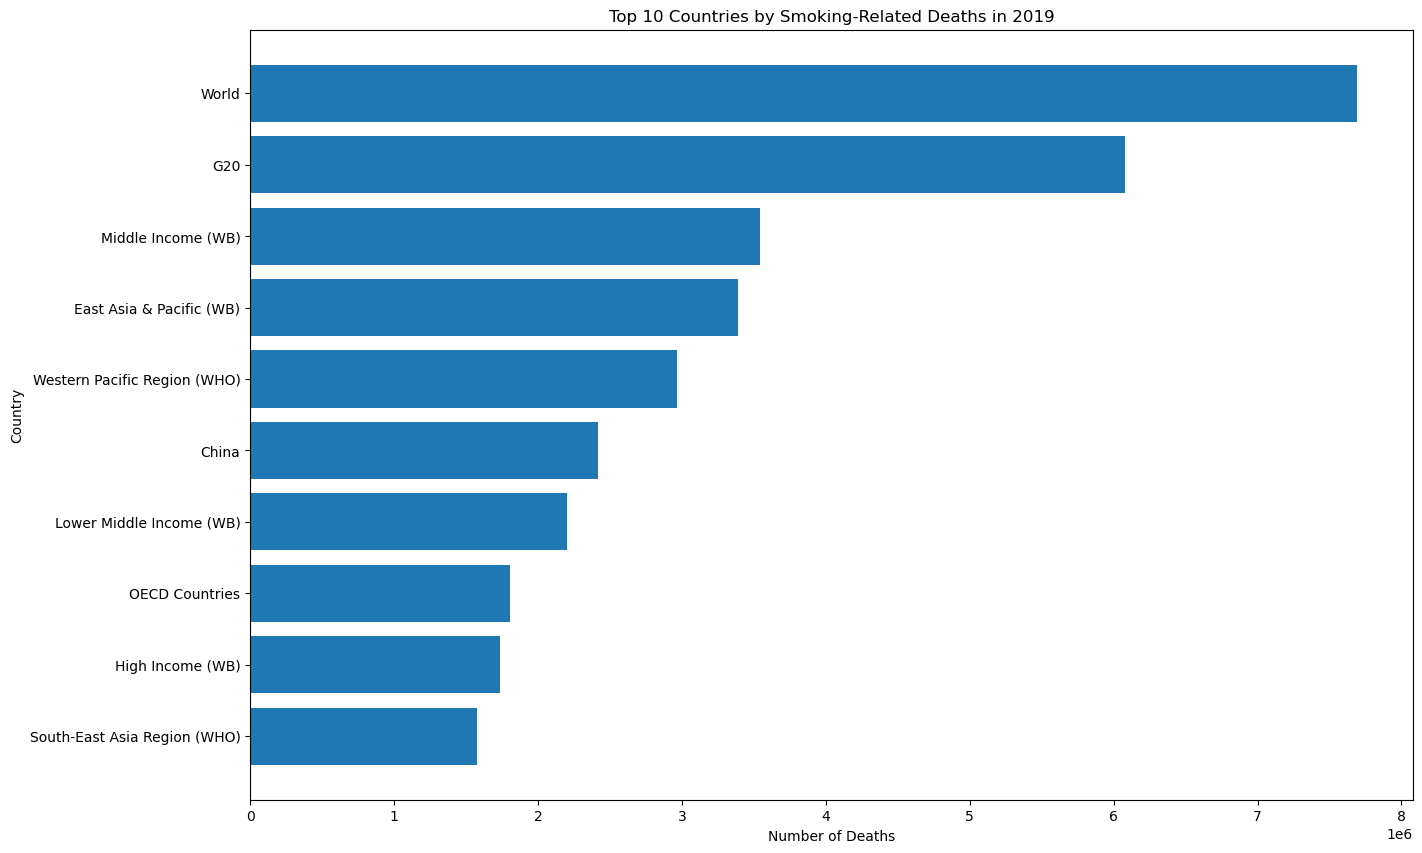

In [14]:
recent_year = df['Year'].max()
data_recent_year = df[df['Year'] == recent_year]
smoking_column = 'Deaths that are from all causes attributed to smoking, in both sexes aged all ages'
data_sorted = data_recent_year[['Entity', smoking_column]].sort_values(by=smoking_column, ascending=False).head(10)
plt.figure(figsize=(15, 10))
plt.barh(data_sorted['Entity'], data_sorted[smoking_column])
plt.xlabel('Number of Deaths')
plt.ylabel('Country')
plt.title(f'Top 10 Countries by Smoking-Related Deaths in {recent_year}')
plt.gca().invert_yaxis()
plt.show()


Global Impact of Smoking: Smoking is the leading cause of death globally, with over 7 million deaths, indicating a severe impact on worldwide health.

High Death Rates in G20 Countries: The data shows that even in developed nations within the G20, smoking remains a major cause of mortality.

Burden in Middle-Income Countries: Middle-income and lower-middle-income countries report notably high numbers of smoking-related deaths, suggesting a significant public health challenge. This is possibly due to higher smoking rates combined with less adequate healthcare facilities.

Regional Impact: The Western Pacific Region of WHO, East Asia & Pacific of the World Bank, and Southeast Asia Region of WHO are particularly affected. China, with its large population and high smoking prevalence, contributes significantly to the mortality figures in these areas.

OECD Countries: These high-income nations report fewer deaths compared to middle-income countries, likely benefiting from better healthcare infrastructure and effective smoking cessation programs.

Call for Action: The data underscores the need for comprehensive tobacco control measures and public health interventions across all countries to reduce the burden of smoking-related diseases.

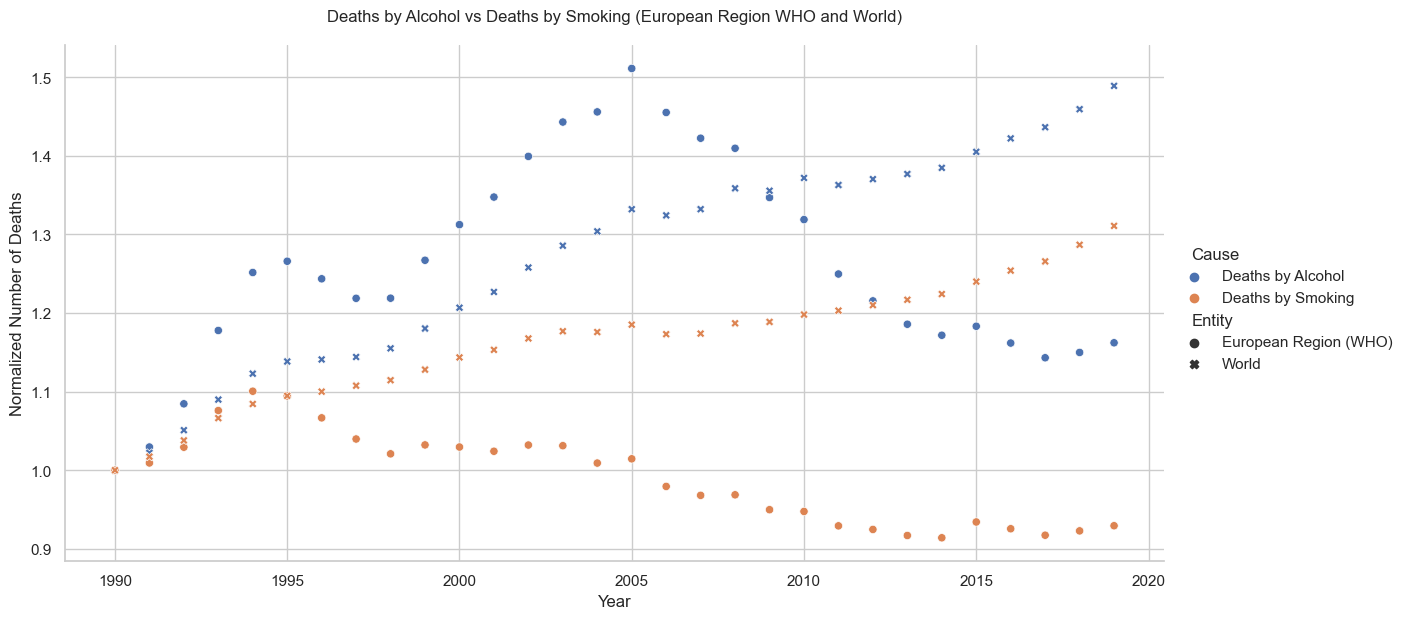

In [16]:
columns_of_interest = [
    'Entity', 
    'Year', 
    'Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages', 
    'Deaths that are from all causes attributed to smoking, in both sexes aged all ages'
]
df_filtered = df[columns_of_interest]
df_eu_world_who = df_filtered[df_filtered['Entity'].isin(['European Region (WHO)', 'World'])]
df_eu_world_who.rename(columns={
    'Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages': 'Deaths by Alcohol',
    'Deaths that are from all causes attributed to smoking, in both sexes aged all ages': 'Deaths by Smoking'
}, inplace=True)

baseline_year = df_eu_world_who['Year'].min()
df_baseline_who = df_eu_world_who[df_eu_world_who['Year'] == baseline_year].set_index('Entity')
df_normalized_who = df_eu_world_who.copy()

for entity in df_normalized_who['Entity'].unique():
    baseline_alcohol = df_baseline_who.loc[entity, 'Deaths by Alcohol']
    baseline_smoking = df_baseline_who.loc[entity, 'Deaths by Smoking']
    
    df_normalized_who.loc[df_normalized_who['Entity'] == entity, 'Deaths by Alcohol'] /= baseline_alcohol
    df_normalized_who.loc[df_normalized_who['Entity'] == entity, 'Deaths by Smoking'] /= baseline_smoking

df_long_normalized_who = df_normalized_who.melt(id_vars=['Entity', 'Year'], 
                                                value_vars=['Deaths by Alcohol', 'Deaths by Smoking'], 
                                                var_name='Cause', value_name='Deaths')

sns.set(style="whitegrid")
g = sns.relplot(data=df_long_normalized_who, x='Year', y='Deaths', hue='Cause', style='Entity', 
                kind='scatter', height=6, aspect=2)

plt.title('Deaths by Alcohol vs Deaths by Smoking (European Region WHO and World)', y=1.03)
plt.xlabel("Year")
plt.ylabel("Normalized Number of Deaths")
plt.show()
warnings.filterwarnings('ignore')

# Discussion
The line graphs for deaths caused by alcohol and smoking in both the EU and the world were normalized to facilitate comparison from a common starting point. The analysis of these graphs revealed distinct trends and intersection points:

Deaths by Alcohol in the EU: This line peaked in 2005, followed by a consistent decline. By 2009, the decline in alcohol-related deaths in the EU became more pronounced, as the global line for alcohol-related deaths surpassed it and continued to rise.
  
Deaths by Alcohol in the World: The global line for alcohol-related deaths initially followed a similar trajectory as the EU but diverged around 2009, increasing steadily thereafter while the EU line continued to decline.
  
Deaths by Smoking in the EU: From 1990 to 1995, the trend for smoking-related deaths in the EU mirrored that of the world. Post-1995, the EU line showed a marked decrease, reaching record-low levels by 2020 (comparatively).
  
Deaths by Smoking in the World: Unlike the EU, the global trend for smoking-related deaths showed a moderate increase after 1995, continuing on this upward trajectory through 2020.

Intersection of Mortality Trends: A significant point of intersection occurred in 2012, where global deaths from smoking surpassed deaths from alcohol in the EU. This indicates shifting public health challenges and the relative impact of these substances over time.

The observed trends highlight the varying impact of public health interventions and socio-economic factors. The decline in alcohol and smoking-related deaths in the EU post-2005 and 1995, respectively, suggests effective public health policies and increased awareness. In contrast, the global rise in these mortality rates indicates a need for stronger international efforts. The comparative analysis of EU and global mortality rates reveals the effectiveness of EU policies but also underscores the ongoing global challenges. While the EU's declining rates reflect successful interventions, the rising global trends call for enhanced international collaboration and comprehensive strategies to reduce the health impacts of smoking and alcohol.


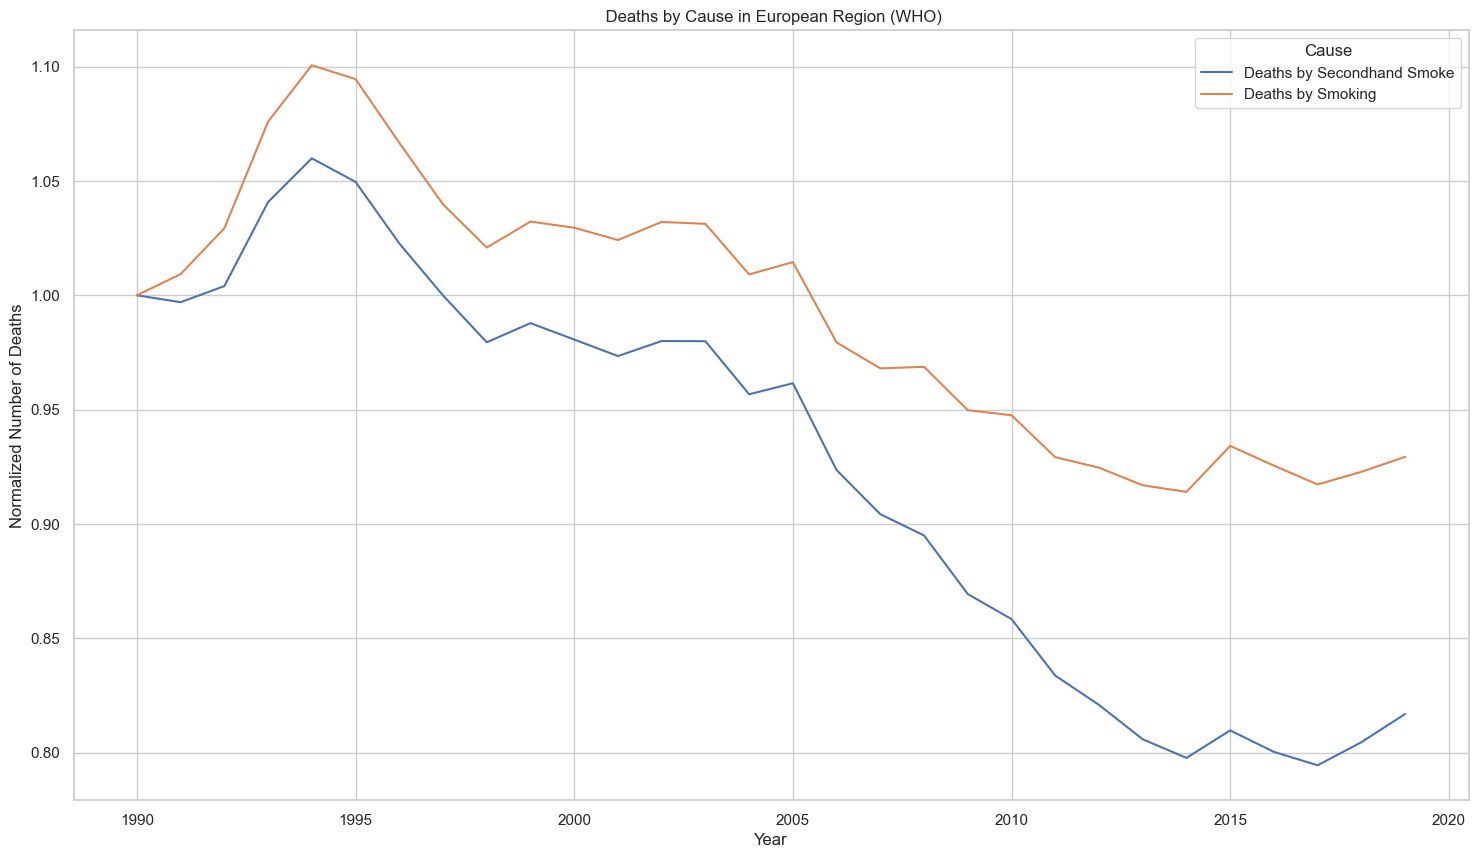

In [18]:
columns_of_interest_extended = [
    'Entity', 
    'Year',
    'Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages',
    'Deaths that are from all causes attributed to smoking, in both sexes aged all ages'
]

df_filtered_extended = df[columns_of_interest_extended]
df_european_region_who = df_filtered_extended[df_filtered_extended['Entity'] == 'European Region (WHO)']
df_european_region_who.rename(columns={
    'Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages': 'Deaths by Secondhand Smoke',
    'Deaths that are from all causes attributed to smoking, in both sexes aged all ages': 'Deaths by Smoking'
}, inplace=True)
baseline_year = df_european_region_who['Year'].min()
df_baseline = df_european_region_who[df_european_region_who['Year'] == baseline_year]

df_normalized = df_european_region_who.copy()
df_normalized['Deaths by Secondhand Smoke'] /= df_baseline['Deaths by Secondhand Smoke'].values[0]
df_normalized['Deaths by Smoking'] /= df_baseline['Deaths by Smoking'].values[0]
df_long_normalized = df_normalized.melt(id_vars=['Year'], 
                                        value_vars=[ 'Deaths by Secondhand Smoke', 'Deaths by Smoking'], 
                                        var_name='Cause', value_name='Normalized Deaths')

plt.figure(figsize=(18, 10))
sns.lineplot(data=df_long_normalized, x='Year', y='Normalized Deaths', hue='Cause')


plt.title(' Deaths by Cause in European Region (WHO)')
plt.xlabel('Year')
plt.ylabel('Normalized Number of Deaths')
plt.legend(title='Cause')
plt.show()
warnings.filterwarnings('ignore')

The data on deaths caused by smoking and secondhand smoke was collected over 30 years, from 1990 to 2020. Both datasets showed a similar trend: an initial rise, peaking in 1994, followed by a decline. This pattern was evident in the line graphs plotted for both variables.

Deaths by Smoking: The line graph indicated an upward trend starting in 1990, reaching its highest point in 1994. After 1994, a gradual decline was observed, suggesting that measures taken to reduce smoking rates might be having a positive impact.
Deaths by Secondhand Smoke: Similarly, deaths due to secondhand smoke peaked in 1994. However, the decline in mortality from secondhand smoke post-1994 was more pronounced compared to deaths caused directly by smoking.



# Finding Correlation between the major variables

In [20]:
columns_of_interest_extended = [
    'Entity', 
    'Year', 
    'Deaths that are from all causes attributed to smoking, in both sexes aged all ages',
    'Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages'
]

df_filtered_extended = df[columns_of_interest_extended]
df_european_region_who = df_filtered_extended[df_filtered_extended['Entity'] == 'European Region (WHO)']
df_european_region_who.rename(columns={
    'Deaths that are from all causes attributed to smoking, in both sexes aged all ages': 'Deaths by Smoking',
    'Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages': 'Deaths by Secondhand Smoke'
}, inplace=True)
correlation = df_european_region_who[['Deaths by Smoking', 'Deaths by Secondhand Smoke']].corr()
warnings.filterwarnings('ignore')
print("Correlation between Smoking and Secondhand Smoking:")
print(correlation)


Correlation between Smoking and Secondhand Smoking:
                            Deaths by Smoking  Deaths by Secondhand Smoke
Deaths by Smoking                     1.00000                     0.97406
Deaths by Secondhand Smoke            0.97406                     1.00000


To quantify the relationship between deaths caused by smoking and secondhand smoke, correlation was calculated between the two variables. The correlation coefficient was calculated to be 0.97406, indicating a very strong positive relationship between the two variables. This high correlation suggests that factors influencing smoking-related deaths likely have a similar impact on deaths caused by secondhand smoke. This finding highlights the importance of comprehensive public health strategies targeting smoking reduction not only for the benefit of smokers but also for reducing harm to non-smokers exposed to secondhand smoke.


# Conclusion
The descriptive and inferential analysis underscores the critical public health issue posed by smoking and alcoholism in Europe. The observed decline in mortality rates since the peak in 1994 is encouraging, yet the persistent high number of deaths calls for continued and enhanced regulatory measures. As European countries work towards meeting the WHO's sustainable development goals, it is imperative to implement effective strategies that address direct, indirect smoking and alcoholism related health risks. Future research and statistical analysis, including more detailed descriptive statistics, graphs, and charts, will be essential to monitor progress and guide public health interventions.



# Reference
https://ourworldindata.org/smoking
